In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_csv("automobile_request.txt", names=[n+1 for n in range(26)])

In [3]:
df

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
df = df.drop(1, axis=1)
df = df.replace("?", np.nan)
df = df.dropna()

In [5]:
df

,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
6,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
8,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
10,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
11,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925
12,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970
13,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
18,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151
19,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295


In [6]:
df_target=df[2]

In [7]:
df_target

3      164
4      164
6      158
8      158
10     192
11     192
12     188
13     188
18     121
19      98
20      81
21     118
22     118
23     118
24     148
25     148
26     148
28     110
29     145
30     137
31     137
32     101
33     101
34     101
35     110
36      78
37     106
38     106
39      85
40      85
      ... 
170    134
171    134
172    134
173     65
174     65
175     65
176     65
177     65
178    197
179    197
180     90
182    122
183    122
184     94
185     94
186     94
187     94
188     94
190    256
194    103
195     74
196    103
197     74
198    103
199     74
200     95
201     95
202     95
203     95
204     95
Name: 2, Length: 159, dtype: object

In [8]:
df_X=df[[n+3 for n in range(24)]]

In [9]:
df_X

,3,4,5,6,7,8,9,10,11,12,...,17,18,19,20,21,22,23,24,25,26
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
10,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
11,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925
12,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970
13,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151
19,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295


In [10]:
df_X2 = pd.get_dummies(df_X)

In [11]:
model = LinearRegression()

In [12]:
model.fit(df_X2, df_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
Pred = model.predict(df_X2)

In [14]:
print("Mean squared error: %.2f"
      % mean_squared_error(df_target, Pred))

Mean squared error: 0.00


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
ax1 = sns.distplot(df_target.astype(int), hist = False, color="b", label="Value")

C:\Users\KBS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


C:\Users\KBS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


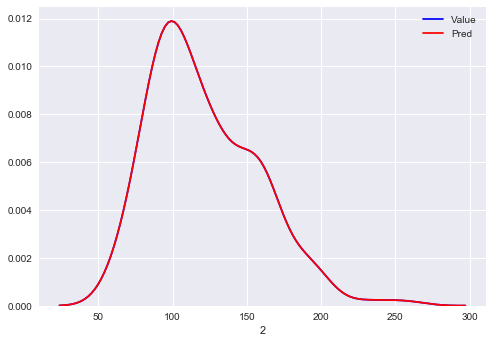

In [17]:

sns.distplot(Pred, hist = False, color="r", label="Pred", ax=ax1)
plt.ylim(0,)
plt.show()